# imports for program

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ridge_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
import ast
import matplotlib.pyplot as plt

# Creation of the data element

In [230]:
Data = pd.read_csv('merged_steam_data.csv')
Data

,appid,name_x,price_x,ccu,type,name_y,required_age,is_free,controller_support,dlc,...,categories,genres,screenshots,movies,recommendations,achievements,release_date,support_info,background,content_descriptors
0,10,Counter-Strike,999.0,16360,game,Counter-Strike,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 118156},NaN,"{'coming_soon': False, 'date': '1 Nov, 2000'}","{'url': 'http://steamcommunity.com/app/10', 'e...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
1,220,Half-Life 2,999.0,1177,game,Half-Life 2,0.0,False,NaN,[323140],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 904, 'name': 'Half-Life 2 Trailer', 't...",{'total': 103743},"{'total': 33, 'highlighted': [{'name': 'Defian...","{'coming_soon': False, 'date': '16 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/220', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
2,240,Counter-Strike: Source,999.0,7752,game,Counter-Strike: Source,0.0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...",NaN,{'total': 87660},"{'total': 147, 'highlighted': [{'name': 'Someo...","{'coming_soon': False, 'date': '1 Nov, 2004'}","{'url': 'http://steamcommunity.com/app/240', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Includes intense vio..."
3,550,Left 4 Dead 2,999.0,20328,game,Left 4 Dead 2,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}]","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 5952, 'name': 'Left 4 Dead - The Sacri...",{'total': 418847},"{'total': 101, 'highlighted': [{'name': 'CL0WN...","{'coming_soon': False, 'date': '16 Nov, 2009'}","{'url': 'http://steamcommunity.com/app/550', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Left 4 Dead 2 featur..."
4,620,Portal 2,199.0,2793,game,Portal 2,0.0,False,full,[323180],...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 81613, 'name': 'Portal 2 - Perpetual T...",{'total': 227268},"{'total': 51, 'highlighted': [{'name': 'Wake U...","{'coming_soon': False, 'date': '18 Apr, 2011'}","{'url': 'http://steamcommunity.com/app/620', '...",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,1593500,God of War,4999.0,12509,game,God of War,18,False,full,NaN,...,"[{'id': 2, 'description': 'Single-player'}, {'...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 0, 'path_thumbnail': 'https://cdn.akam...","[{'id': 256864004, 'name': 'Features Trailer',...",{'total': 19841},"{'total': 37, 'highlighted': [{'name': 'Father...","{'coming_soon': False, 'date': '14 Jan, 2022'}",{'url': 'https://support.sms.playstation.com/h...,https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [2, 5], 'notes': 'Gameplay consists of..."
335,1677740,Stumble Guys,799.0,4423,game,Stumble Guys,0,False,NaN,NaN,...,"[{'id': 1, 'description': 'Multi-player'}, {'i...","[{'id': '1', 'description': 'Action'}, {'id': ...","[{'id': 16, 'path_thumbnail': 'https://cdn.aka...","[{'id': 256856802, 'name': 'Stumble Guys out o...",{'total': 1046},NaN,"{'coming_soon': False, 'date': '7 Oct, 2021'}","{'url': '', 'email': 'support@kitkagames.com'}",https://cdn.akamai.steamstatic.com/steam/apps/...,"{'ids': [], 'notes': None}"
336,1794680,Vampire Survivors,299.0,52451,game,Vampire Survivors,0.0,False,full,NaN,...,"[{'id': 2, 'description': 'Single-pla

# checking genres available

In [231]:
Data = Data.dropna(subset='genres')
genres = {""}

for i in Data.loc[:, "genres"]:
    literal = ast.literal_eval(i)
    for x in literal:
        genres.add(x ["description"])
        #print(x ["description"])

genres

{'',
 'Action',
 'Adventure',
 'Casual',
 'Early Access',
 'Indie',
 'Massively Multiplayer',
 'RPG',
 'Racing',
 'Simulation',
 'Sports',
 'Strategy'}

In [232]:
Action = Data[0:0]
Adventure = Data[0:0]
Casual = Data[0:0]
EarlyAccess = Data[0:0]
Indie = Data[0:0]
MassivelyMultiplayer = Data[0:0]
RPG = Data[0:0]
Racing = Data[0:0]
Simulation = Data[0:0]
Sports = Data[0:0]
Strategy = Data[0:0]

for i,x in Data.iterrows():
    if 'Action' in x ["genres"]:
        Action.loc[len(Action)] = x

    if 'Adventure' in x ["genres"]:
        Adventure.loc[len(Action)] = x
    
    if 'Casual' in x ["genres"]:
        Casual.loc[len(Action)] = x
    
    if 'Early Access' in x ["genres"]:
        EarlyAccess.loc[len(Action)] = x
    
    if 'Indie' in x ["genres"]:
        Indie.loc[len(Action)] = x
    
    if 'Massively Multiplayer' in x ["genres"]:
        MassivelyMultiplayer.loc[len(Action)] = x
    
    if 'RPG' in x ["genres"]:
        RPG.loc[len(Action)] = x
    
    if 'Simulation' in x ["genres"]:
        Simulation.loc[len(Action)] = x
    
    if 'Sports' in x ["genres"]:
        Sports.loc[len(Action)] = x
    
    if 'Strategy' in x ["genres"]:
        Strategy.loc[len(Action)] = x
    
    

Action.loc[:, "genres"] = 'Action'
Action = Action.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Adventure.loc[:, "genres"] = 'Adventure'
Adventure = Adventure.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Casual.loc[:, "genres"] = 'Casual'
Casual = Casual.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

EarlyAccess.loc[:, "genres"] = 'Early Access'
EarlyAccess = EarlyAccess.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Indie.loc[:, "genres"] = 'Indie'
Indie = Indie.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

MassivelyMultiplayer.loc[:, "genres"] = 'Massively Multiplayer'
MassivelyMultiplayer = MassivelyMultiplayer.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

RPG.loc[:, "genres"] = 'RPG'
RPG = RPG.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Simulation.loc[:, "genres"] = 'Simulation'
Simulation = Simulation.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Sports.loc[:, "genres"] = 'Sports'
Sports = Sports.loc[:,['name_x', 'price_x', 'ccu', 'genres']]

Strategy.loc[:, "genres"] = 'Strategy'
Strategy = Strategy.loc[:,['name_x', 'price_x', 'ccu', 'genres']]


RelevantData = pd.concat([Action, Adventure, Casual, EarlyAccess, Indie, MassivelyMultiplayer, RPG, Simulation, Sports, Strategy], ignore_index=True)
RelevantData ['ccu'] = RelevantData ['ccu'].astype(float)
RelevantData ['ccu'] = np.log1p(RelevantData ['ccu'])

C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_27876\750766691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = x
C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_27876\750766691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = x
C:\Users\n-rasmussen\AppData\Local\Temp\ipykernel_27876\750766691.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Action.loc[len(Action)] = 

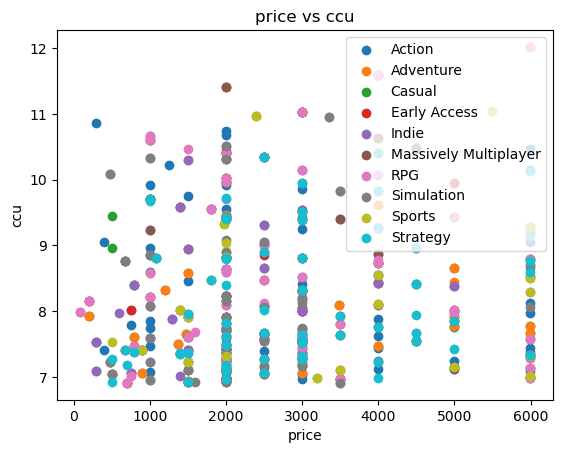

In [233]:


fig, ax = plt.subplots()

genres = RelevantData["genres"].unique()

for g in genres:
  x = RelevantData.loc[RelevantData.genres == g, 'price_x']
  y = RelevantData.loc[RelevantData.genres == g, 'ccu']

  ax.scatter(x,y, label = g)

ax.set_xlabel("price")
ax.set_ylabel("ccu")
ax.set_title("price vs ccu")
ax.legend()

In [239]:


modelgenres = pd.Series()
for g in genres:
  print("results for " + g + ": \n")
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
  
  

  #param = [float(x/10) for x in range(0, 20)]
  param = {
    #"alpha": [float(x/10) for x in range(0, 200)]
    "alpha": range(0, 20),
    "fit_intercept" : [True, False],
    "max_iter" : range(1000, 15000, 1000)
  }
  
  model = Ridge(random_state= 20)

  gsModel = GridSearchCV(model, 
                        param_grid = param,
                        scoring=["neg_mean_squared_error", "r2"],
                        refit= "r2",
                        cv=5
                       )

  gsModel.fit(X_train, y_train)

  #modelgenres.add(g)

  model = gsModel.best_estimator_

  modelgenres [g] = model

  display(gsModel.best_params_)

  display(mean_squared_error(y_train, gsModel.predict(X_train)))
  display(r2_score(y_train, gsModel.predict(X_train)))




results for Action: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

1.3156366806752071

0.0007707746751254296

results for Adventure: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

1.132943762186078

0.005605921337764275

results for Casual: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

0.7640201788693888

0.04820101225862272

results for Early Access: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

1.1240989574514524

0.007151339751717778

results for Indie: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

1.0267220759672857

0.011217406031338695

results for Massively Multiplayer: 



{'alpha': 0, 'fit_intercept': True, 'max_iter': 1000}

1.7538596980046262

0.087453785416712

results for RPG: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

1.5276504080057185

0.014853198793557731

results for Simulation: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

1.0841712761771956

0.000600389196390827

results for Sports: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

0.9810260521028993

0.04392346265802671

results for Strategy: 



{'alpha': 19, 'fit_intercept': True, 'max_iter': 1000}

0.9992709970187877

0.04731622019968318

In [235]:
for g in genres:
  print("results for " + g + ": \n")
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
  model = modelgenres [g]

  print(model.score(X_train,y_train))
  print(model.score(X_test,y_test))

results for Action: 

0.0007707746751254296
7.612288616010154e-06
results for Adventure: 

0.005605921337764275
-0.039509479909570766
results for Casual: 

0.0482010122586326
-0.40684397277255036
results for Early Access: 

0.007151339751717778
-0.1560683602132662
results for Indie: 

0.011217406031338695
-0.01213694317385805
results for Massively Multiplayer: 

0.08745378541665005
-0.3237060890636345
results for RPG: 

0.014853198793557731
-0.1519996067110143
results for Simulation: 

0.000600389196390827
-0.03645416068279439
results for Sports: 

0.04392346265802671
-0.42101903501216875
results for Strategy: 

0.04731622019968318
-0.02068287355337306


Text(0.5, 1.0, 'price vs ccu')

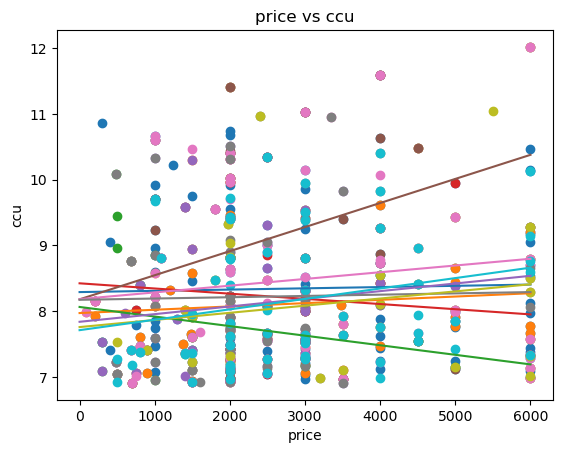

In [236]:

fig, ax = plt.subplots()
'''fig.set_figheight(40)
fig.set_figwidth(20)'''

genres = RelevantData["genres"].unique()

for g in genres:
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]

  ax.scatter(X,y, label = g)
#  print("results for " + g + ": \n")

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
  model = model = modelgenres [g]
  
  #print(X_train)

  slope = model.coef_
  x_graph = np.linspace(0, 6000)
  x_graph = x_graph.reshape(-1,1)
  y_graph = (x_graph * slope) + model.intercept_

  ax.plot(x_graph, y_graph, label="Regression trend line of " + g)

ax.set_xlabel("price")
ax.set_ylabel("ccu")
ax.set_title("price vs ccu")
#ax.legend()

In [237]:
genres = RelevantData["genres"].unique()
matrices = []
for g in genres:
  X = RelevantData.loc[RelevantData.genres == g, ['price_x']]
  y = RelevantData.loc[RelevantData.genres == g, ['ccu']]

#  print("results for " + g + ": \n")

  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)
  model = modelgenres [g]
  
  #print(X_train)

  print(r2_score(y, model.predict(X)))
  print(mean_squared_error(y, model.predict(X)))

  print("\n")

0.0009482103998181834
1.3194550761935262


0.012394758742384049
1.3497099329367221


0.02671110485996897
0.6587640442507487


4.7651422986350056e-05
1.187130729148016


0.011133959337884525
1.1742374745516382


0.010859107883328112
1.9718902812212007


-0.004372205438042842
1.601536619128186


-0.0003583649599998573
1.1475165700471532


-0.026431444844364105
1.2814556487169972


0.037973218365239036
0.9440524220765407


